<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI2_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PauForestal/master_bdds/main/Modulo2/datos_facturas.csv', sep=";", decimal = ',')

In [ ]:
#df.sort_values('total_pagado', ascending=True)
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB


In [ ]:
df.describe(include=[np.number])

,id,importe_factura,porcentaje_IVA,IVA,total_pagado
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,126.777778,16.000000,20.531111,147.308889
std,13.133926,49.026379,4.045199,10.026461,57.936116
min,1.000000,25.000000,8.000000,2.400000,29.500000
25%,12.000000,100.000000,18.000000,13.500000,108.000000
50%,23.000000,125.000000,18.000000,18.000000,135.000000
75%,34.000000,175.000000,18.000000,27.000000,189.000000
max,45.000000,200.000000,18.000000,36.000000,236.000000


## **1. MEDIDAS DE CENTRALIZACIÓN**

---



In [ ]:
dict_mean_median = {}
dict_mode = {}

for col, types in df.dtypes.items():
    if col != 'id' and types != 'object':
        columns_name = []
        index_name = ['mean','median','mode']
        columns_name.append(col)
        dict_mean_median[col] = df[col].agg(["mean","median"])
        dict_mode[col] = df[col].mode().to_list()

df_mean_median = pd.DataFrame(dict_mean_median).reset_index()
df_mean_median.columns = ['medidas','importe_factura','porcentaje_IVA','IVA','total_pagado']

df_mode = pd.DataFrame.from_dict(dict_mode,orient='index').transpose()
df_mode['medidas'] = ['moda1','moda2']
df_mode = df_mode[['medidas','importe_factura','porcentaje_IVA','IVA','total_pagado']]

central_tendency = pd.merge(df_mean_median, df_mode, how='outer')
central_tendency

,medidas,importe_factura,porcentaje_IVA,IVA,total_pagado
0,mean,126.777778,16.0,20.531111,147.308889
1,median,125.000000,18.0,18.000000,135.000000
2,moda1,100.000000,18.0,18.000000,118.000000
3,moda2,NaN,NaN,36.000000,236.000000


In [ ]:
def central_tendency(col):
  mean = f'MEAN: {round(df[col].mean(),2)}'
  median = f'MEDIAN: {df[col].median()}'
  mode = f'MODE: {df[col].mode().to_list()}'
  print(f'Las medidas de tendencia central para la variable "{col}" son:\n\n{mean}\n{median}\n{mode}\n')

In [ ]:
central_tendency('total_pagado')

Las medidas de tendencia central para la variable "total_pagado" son:

MEAN: 147.31
MEDIAN: 135.0
MODE: [118.0, 236.0]



In [ ]:
for col, types in df.dtypes.items():
    if col != 'id' and types != 'object':
        central_tendency(col)    

Las medidas de tendencia central para la variable "importe_factura" son:

MEAN: 126.78
MEDIAN: 125.0
MODE: [100]

Las medidas de tendencia central para la variable "porcentaje_IVA" son:

MEAN: 16.0
MEDIAN: 18.0
MODE: [18]

Las medidas de tendencia central para la variable "IVA" son:

MEAN: 20.53
MEDIAN: 18.0
MODE: [18.0, 36.0]

Las medidas de tendencia central para la variable "total_pagado" son:

MEAN: 147.31
MEDIAN: 135.0
MODE: [118.0, 236.0]



## **2. MEDIDAS DE DISPERSION**

---

In [ ]:
def dispersion_measure(col):
    range = np.max(df[col]) - np.min(df[col])
    variance = round(np.var(df[col], ddof=1),2)
    standard_deviation = round(np.std(df[col], ddof=1),2)
    cv = '{:.2%}'.format(standard_deviation / np.mean(df[col]))
    print(f'Las medidas de dispersión para la variable "{col}" son:\n\nRANGE: {range}\nVARIANCE: {variance}\nSTANDARD DEVIATION: {standard_deviation}\nCORRELATION COEFFICIENT: {cv}')

In [ ]:
dispersion_measure('total_pagado')

Las medidas de dispersión para la variable "total_pagado" son:

RANGE: 206.5
VARIANCE: 3356.59
STANDARD DEVIATION: 57.94
CORRELATION COEFFICIENT: 39.33%


## **3. MEDIDAS DE POSICIÓN**

---

In [83]:
def position_measure(col):
  IQR = ss.iqr(df[col], interpolation='midpoint')
  #Q1 = np.percentile(df[col], 25, interpolation='midpoint')
  Q1 = df[col].quantile(0.25)
  #D3 = np.percentile(df[col], 90, interpolation='midpoint')
  D3 = df[col].quantile(0.9)
  print(f'INTERQUARTILE RANGE: {IQR}\nQ1: {Q1}\nD3: {D3}')

In [ ]:
position_measure('total_pagado')

INTERQUARTILE RANGE: 81.0
FIRST QUARTILE: 108.0
DECILE: 236.0


In [82]:
df['Decile_rank'] = pd.qcut(df['total_pagado'], q=10, duplicates='drop')

## **4. MEDIDAS DE CONCENTRACIÓN y FORMA (DISTRIBUCIÓN)**

---

In [ ]:
def distribution_measure(col):
    asimetria = round(df[col].skew(), 3)
    curtosis = round(df[col].kurt(), 3)
    print(f'Las medidas de distribución (o concentración y forma) para la variable "{col}" son:\n\nASIMETRIA: {asimetria},\nCURTOSIS: {curtosis}\n')

Las medidas de distribución (o concentración y forma) para la variable "total_pagado" son:

ASIMETRIA: 0.096,
CURTOSIS: -0.799



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


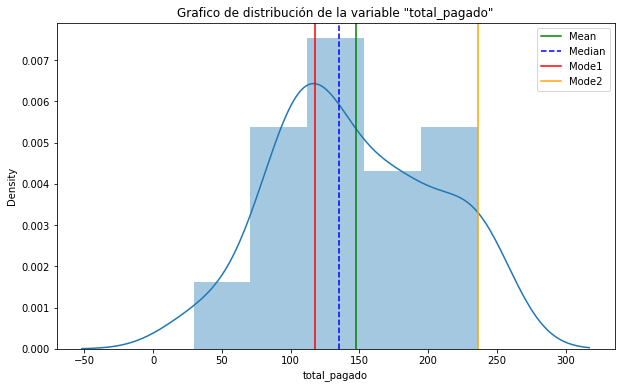

In [ ]:
distribution_measure('total_pagado')

mean=df['total_pagado'].mean()
median=df['total_pagado'].median()
mode=df['total_pagado'].mode()

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(df['total_pagado']);

plt.title('Grafico de distribución de la variable "total_pagado"')
plt.axvline(mean, color='green', label='Mean')
plt.axvline(median, color='blue', label='Median', linestyle = '--')
plt.axvline(mode[0], color='red', label='Mode1')
plt.axvline(mode[1], color='orange', label='Mode2')
plt.legend();

## **5. ANÁLISIS BOXPLOT Y SUS MEDIDAS**


---

Median: 135.0
Mean: 147.3
Minimum: 29.5
Maximum: 236.0
Q1: 108.0
Q3: 189.0
Lower outliers: []
Upper outliers: []




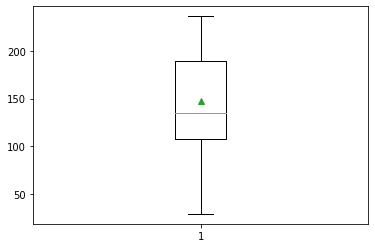

In [ ]:
data = df['total_pagado']
bp = plt.boxplot(data, showmeans=True)

medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
fliers = [item.get_ydata() for item in bp['fliers']]
lower_outliers = []
upper_outliers = []

for i in range(len(fliers)):
    lower_outliers_by_box = []
    upper_outliers_by_box = []
    for outlier in fliers[i]:
        if outlier < q1[i]:
            lower_outliers_by_box.append(round(outlier, 1))
        else:
            upper_outliers_by_box.append(round(outlier, 1))
    lower_outliers.append(lower_outliers_by_box)
    upper_outliers.append(upper_outliers_by_box)    
    
stats = [medians, means, minimums, maximums, q1, q3, lower_outliers, upper_outliers]
stats_names = ['Median', 'Mean', 'Minimum', 'Maximum', 'Q1', 'Q3', 'Lower outliers', 'Upper outliers']

for j in range(len(stats)):
    print(f'{stats_names[j]}: {stats[j][i]}')

print('\n')

## **6. ANÁLISIS DE PAGO DE FACTURAS POR CLIENTE**

---

In [ ]:
df.groupby('cliente')['total_pagado'].sum()

cliente
clienteA    2099.0
clienteB    1337.0
clienteC    1154.5
clienteD    2038.4
Name: total_pagado, dtype: float64

In [ ]:
df.query('factura_pagada == "si"').groupby('cliente')['total_pagado'].sum()

cliente
clienteA    1534.0
clienteB     924.0
clienteC     584.5
clienteD    1534.0
Name: total_pagado, dtype: float64

## **7. ANÁLISIS DE FACTURAS NO PAGADAS POR CLIENTE, EN EL MES DE FEBRERO**

---

In [ ]:
df.query('factura_pagada == "no" and mes == "Febrero"').groupby(['cliente','mes','factura_pagada']).agg({'total_pagado': 'sum', 'factura_pagada': 'count'}).sort_values('total_pagado', ascending=False)

,,,total_pagado,factura_pagada
cliente,mes,factura_pagada,,
clienteC,Febrero,no,285.0,2
clienteA,Febrero,no,135.0,1
clienteB,Febrero,no,59.0,1
clienteD,Febrero,no,32.4,1


## **8. GRAFICO DE DISPERSIÓN ENTRE TOTAL PAGADO DE FACTURAS E IVA APLICADO**

---

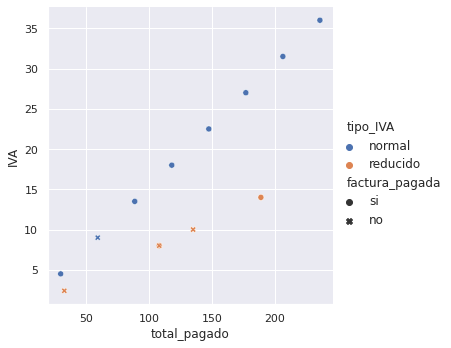

In [ ]:
# diagrama de dispersión
sns.set_theme(style="darkgrid")

sns.relplot(x='total_pagado', y='IVA', hue='tipo_IVA', style='factura_pagada', data=df);

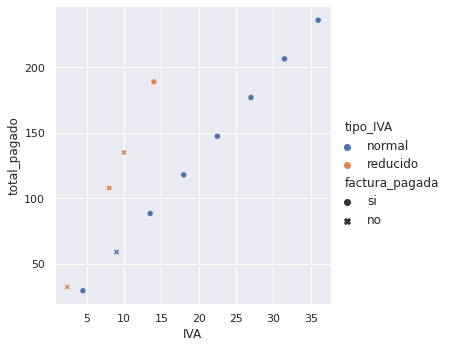

In [ ]:
sns.relplot(x='IVA', y='total_pagado', hue='tipo_IVA', style='factura_pagada', data=df);

## **7. COVARIANZA ENTRE TOTAL PAGADO E IVA APLICADO**

---

In [80]:
def cov(a,b):
  cov = round(((df[a] -  df[a].mean()) * (df[b] -  df[b].mean())).sum() / (df.shape[0] - 1),2)
  return cov

In [81]:
cov('IVA','total_pagado')

526.77

In [76]:
df[['total_pagado','IVA']].corr()

,total_pagado,IVA
total_pagado,1.000000,0.906824
IVA,0.906824,1.000000


- REVISAR PREGUNTA 3 RELACIONADO A LOS DECILES
- REVISAR GRAFICO DE DISPERSIÓN
- REVISAR COVARIANZA...